In [1]:
%cd ../..
%load_ext autoreload
%autoreload 2

/home/jupyter/map-ephys


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from pynwb import NWBFile, TimeSeries, NWBHDF5IO
from pipeline.export import nwb_foraging

[2022-11-10 19:29:17,696][INFO]: Connecting map-superuser@datajoint.mesoscale-activity-map.org:3306
[2022-11-10 19:29:17,766][INFO]: Connected map-superuser@datajoint.mesoscale-activity-map.org:3306


# Export a specific session to nwb format (not saved fo a .nwb file)

This is a good example session

In [3]:
session_key = {'subject_id': 482353, 'session': 45}

Export the whole session to the NWB format

In [4]:
nwb = nwb_foraging.datajoint_to_nwb(session_key)

In [77]:
nwb

root pynwb.file.NWBFile at 0x140095916909712
Fields:
  acquisition: {
    BehavioralEvents <class 'pynwb.behavior.BehavioralEvents'>
  }
  devices: {
    18005108622 (neuropixels 1.0 - 3B) <class 'pynwb.device.Device'>,
    18005123491 (neuropixels 1.0 - 3B) <class 'pynwb.device.Device'>
  }
  electrode_groups: {
    18005108622 1-384 <class 'pynwb.ecephys.ElectrodeGroup'>,
    18005123491 1-384 <class 'pynwb.ecephys.ElectrodeGroup'>
  }
  electrodes: electrodes <class 'hdmf.common.table.DynamicTable'>
  experiment_description: moving lickports, delay period, early lick punishment, sound GO cue then free choice
  experimenter: ['HH']
  file_create_date: [datetime.datetime(2022, 11, 7, 23, 10, 6, 985953, tzinfo=tzlocal())]
  identifier: HH13_20211117_110858_s45
  institution: Janelia Research Campus / Allen Institute
  related_publications: ['']
  session_description: PERFECT
  session_start_time: 2021-11-17 11:08:58+00:00
  subject: subject pynwb.file.Subject at 0x140095241622480
Field

### Retrieve trial info

Including `choice`, `outcome`, and some latent variables from model fitting (`left_action_value`, `right_action_value`, `rpe`).

In [75]:
df_trials = nwb.trials.to_dataframe()
df_trials

,start_time,stop_time,trial,trial_uid,task,task_protocol,trial_instruction,early_lick,outcome,auto_water,free_water,choice,left_reward_prob,right_reward_prob,left_action_value,right_action_value,rpe
id,,,,,,,,,,,,,,,,,
0,-0.5381,9.5510,1,30881,foraging,100,none,no early,hit,0,0,left,0.338,0.113,0.510122,0.000000,1.000000
1,9.5510,16.5274,2,30882,foraging,100,none,no early,miss,0,0,left,0.338,0.113,0.282956,0.000000,-0.510122
2,16.5274,27.1126,3,30883,foraging,100,none,early,hit,0,0,left,0.338,0.113,0.648736,0.000000,0.717044
3,27.1126,39.9647,4,30884,foraging,100,none,early,hit,0,0,left,0.338,0.113,0.827923,0.000000,0.351264
4,39.9647,45.9172,5,30885,foraging,100,none,no early,miss,0,0,left,0.338,0.113,0.459234,0.000000,-0.827923
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
677,6470.6752,6485.7258,678,31558,foraging,100,none,early,miss,0,0,left,0.113,0.338,0.000231,0.025060,-0.000417
678,6485.7258,6496.2766,679,31559,foraging,100,none,no early,ignore,0,0,null,0.113,0.338,NaN,NaN,NaN
679,6496.2766,6508.5194,680,31560,foraging,100,none,early,miss,0,0,left,0.113,0.338,0.000128,0.005225,-0.000231


Plot the behavior.

(<Figure size 1600x600 with 1 Axes>, <AxesSubplot:>)

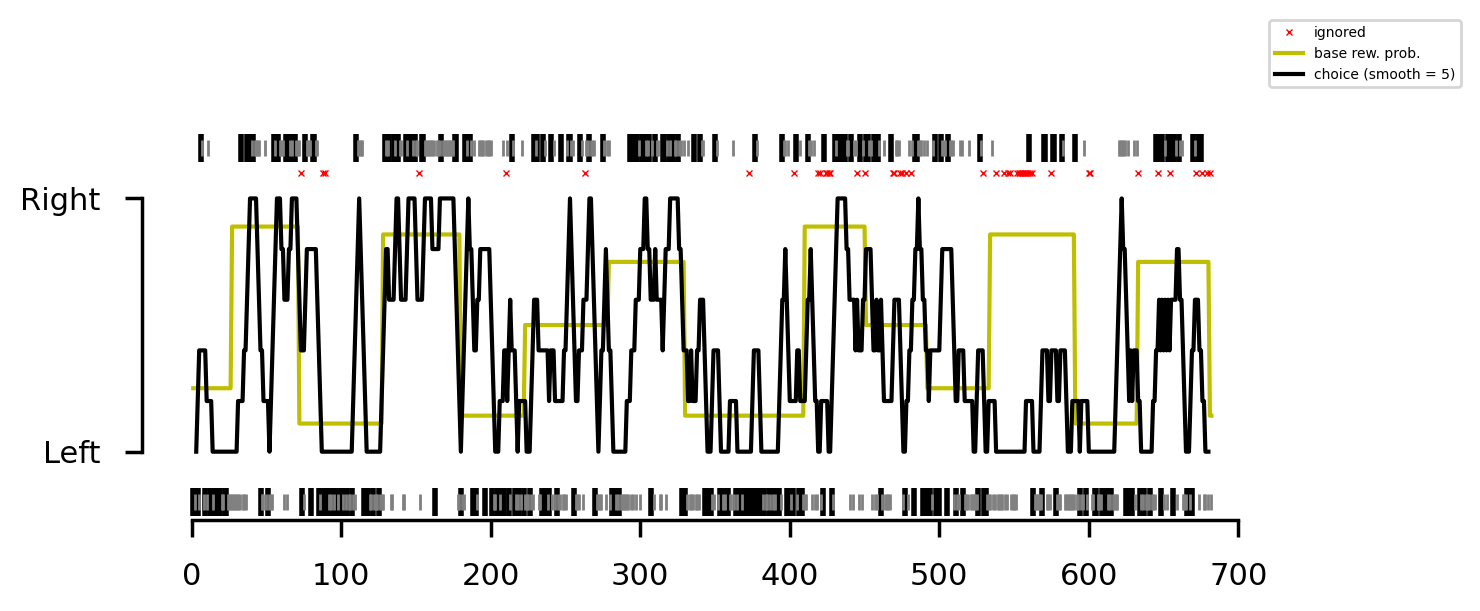

In [73]:
from pipeline.plot import foraging_model_plot

# Reformat data
_choice_history = df_trials.choice.values
choice_history = np.array([{'left': 0, 'right': 1, 'null': np.nan}[c] for c in _choice_history])

_reward = df_trials.outcome
reward_history = np.zeros([2, len(_reward)])  # .shape = (2, N trials)
for c in (0, 1):
    reward_history[c, choice_history==c] = (_reward[choice_history==c] == 'hit').astype(int)
    
p_reward = np.vstack([df_trials.left_reward_prob, df_trials.right_reward_prob])

# Plot session
foraging_model_plot.plot_session_lightweight([np.array([choice_history]), reward_history, p_reward])

### Retrieve event times

In [36]:
nwb.acquisition

{'BehavioralEvents': BehavioralEvents pynwb.behavior.BehavioralEvents at 0x139725633278224
 Fields:
   time_series: {
     bitcodestart <class 'pynwb.base.TimeSeries'>,
     bpodstart <class 'pynwb.base.TimeSeries'>,
     choice <class 'pynwb.base.TimeSeries'>,
     go <class 'pynwb.base.TimeSeries'>,
     left_lick <class 'pynwb.base.TimeSeries'>,
     reward <class 'pynwb.base.TimeSeries'>,
     right_lick <class 'pynwb.base.TimeSeries'>,
     trialend <class 'pynwb.base.TimeSeries'>,
     zaberready <class 'pynwb.base.TimeSeries'>,
     zaberstep <class 'pynwb.base.TimeSeries'>
   }}

All time stamps are relative to the first trial start of this session (in seconds). <br>
For exqmple, time stamps of `go` cue

In [57]:
nwb.acquisition['BehavioralEvents']['go'].timestamps[:10]

array([ 0.53142, 12.39063, 19.66991, 32.94569, 41.91493, 46.91979,
       53.32723, 64.47675, 72.82484, 79.6646 ])

Time stamps of all left licks

In [58]:
nwb.acquisition['BehavioralEvents']['left_lick'].timestamps[:10]

array([0.7173 , 0.86981, 0.98371, 1.131  , 1.25177, 1.38798, 1.5208 ,
       1.66485, 1.78918, 1.92897])

## Retrieve ephys

In this example session, two probes were inserted at the same time

In [79]:
nwb.devices

{'18005123491 (neuropixels 1.0 - 3B)': 18005123491 (neuropixels 1.0 - 3B) pynwb.device.Device at 0x140094564194448,
 '18005108622 (neuropixels 1.0 - 3B)': 18005108622 (neuropixels 1.0 - 3B) pynwb.device.Device at 0x140095911757072}

`nwb.electrodes` stores information of all electrodes (recording sites) on all probes in this session

In [80]:
nwb.electrodes.to_dataframe()

,x,y,z,imp,location,filtering,group,group_name,shank,shank_col,shank_row,electrode_id,ccf_annotation,rel_x,rel_y,rel_z
id,,,,,,,,,,,,,,,,
0,5240.0,7120.0,6778.0,-1.0,"{""brain_regions"": ""right Striatum""}",,18005123491 1-384 pynwb.ecephys.ElectrodeGroup...,18005123491 1-384,1,1,1,1,root,16.0,0.0,NaN
1,5240.0,7120.0,6778.0,-1.0,"{""brain_regions"": ""right Striatum""}",,18005123491 1-384 pynwb.ecephys.ElectrodeGroup...,18005123491 1-384,1,2,1,2,root,48.0,0.0,NaN
2,5240.0,7100.0,6778.0,-1.0,"{""brain_regions"": ""right Striatum""}",,18005123491 1-384 pynwb.ecephys.ElectrodeGroup...,18005123491 1-384,1,1,2,3,root,0.0,20.0,NaN
3,5240.0,7100.0,6778.0,-1.0,"{""brain_regions"": ""right Striatum""}",,18005123491 1-384 pynwb.ecephys.ElectrodeGroup...,18005123491 1-384,1,2,2,4,root,32.0,20.0,NaN
4,5240.0,7080.0,6778.0,-1.0,"{""brain_regions"": ""right Striatum""}",,18005123491 1-384 pynwb.ecephys.ElectrodeGroup...,18005123491 1-384,1,1,3,5,root,16.0,40.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,5100.0,3520.0,3298.0,-1.0,"{""brain_regions"": ""left Striatum""}",,18005108622 1-384 pynwb.ecephys.ElectrodeGroup...,18005108622 1-384,1,2,190,380,Caudoputamen,32.0,3780.0,NaN
764,5100.0,3500.0,3298.0,-1.0,"{""brain_regions"": ""left Striatum""}",,18005108622 1-384 pynwb.ecephys.ElectrodeGroup...,18005108622 1-384,1,1,191,381,Caudoputamen,16.0,3800.0,NaN
765,5100.0,3500.0,3298.0,-1.0,"{""brain_regions"": ""left Striatum""}",,18005108622 1-384 pynwb.ecephys.ElectrodeGroup...,18005108622 1-384,1,2,191,382,Caudoputamen,48.0,3800.0,NaN


`nwb.units` stores all units 

In [81]:
nwb.units

units pynwb.misc.Units at 0x140094568031056
Fields:
  colnames: ['insertion_number' 'sampling_rate' 'unit_quality' 'unit_posx' 'unit_posy'
 'unit_amp' 'unit_snr' 'isi_violation' 'avg_firing_rate' 'drift_metric'
 'presence_ratio' 'amplitude_cutoff' 'isolation_distance' 'l_ratio'
 'd_prime' 'nn_hit_rate' 'nn_miss_rate' 'silhouette_score' 'max_drift'
 'cumulative_drift' 'duration' 'halfwidth' 'pt_ratio'
 'repolarization_slope' 'recovery_slope' 'spread' 'velocity_above'
 'velocity_below' 'unit_id' 'spike_times' 'electrodes' 'waveform_mean'
 'waveform_sd']
  columns: (
    insertion_number <class 'hdmf.common.table.VectorData'>,
    sampling_rate <class 'hdmf.common.table.VectorData'>,
    unit_quality <class 'hdmf.common.table.VectorData'>,
    unit_posx <class 'hdmf.common.table.VectorData'>,
    unit_posy <class 'hdmf.common.table.VectorData'>,
    unit_amp <class 'hdmf.common.table.VectorData'>,
    unit_snr <class 'hdmf.common.table.VectorData'>,
    isi_violation <class 'hdmf.common.t

In [83]:
unit_df = nwb.units.to_dataframe()
unit_df

,insertion_number,sampling_rate,unit_quality,unit_posx,unit_posy,unit_amp,unit_snr,isi_violation,avg_firing_rate,drift_metric,...,repolarization_slope,recovery_slope,spread,velocity_above,velocity_below,unit_id,spike_times,electrodes,waveform_mean,waveform_sd
id,,,,,,,,,,,,,,,,,,,,,
0,1,30000,multi,11.0,140.0,99.906752,3.057975,0.087898,4.264550,NaN,...,0.415506,-0.041533,300.0,1.420210,-1.430770,0,"[-5.914346030842827, -5.787479091805529, -5.69...",x y z imp ...,"[1.600896439317954, 1.4786547141424273, 1.3987...",[nan]
1,1,30000,good,11.0,180.0,149.839502,4.150745,0.008465,9.710860,NaN,...,0.634124,-0.088669,300.0,1.121720,-1.316310,4,"[-3.0876066287826713, -2.974873053421625, -2.4...",x y z imp ...,"[0.8473376132930514, 0.7765294561933535, 0.370...",[nan]
2,1,30000,good,27.0,240.0,85.144484,2.348818,0.028962,1.217070,NaN,...,0.306367,-0.030679,300.0,1.098830,-1.471650,6,"[-5.863145920921311, -5.378511547126441, -4.81...",x y z imp ...,"[-1.275414156626506, -1.1412838855421688, -0.5...",[nan]
3,1,30000,good,27.0,280.0,115.388590,3.054645,0.038166,39.155200,NaN,...,0.523354,-0.171948,300.0,0.851405,-0.905485,10,"[-5.955746119724678, -5.953579448406384, -5.95...",x y z imp ...,"[-1.86936372745491, -2.1276928857715434, -2.09...",[nan]
4,1,30000,multi,43.0,300.0,97.839096,2.139142,0.000000,0.129270,NaN,...,0.367811,-0.050198,300.0,1.633080,-1.332660,11,"[-3.85027493282192, 8.755085462959649, 10.5555...",x y z imp ...,"[1.2023492907801419, 0.9114583333333334, 1.543...",[nan]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
252,2,30000,good,59.0,3480.0,105.124779,3.363175,0.022162,3.921500,NaN,...,0.299877,-0.026759,200.0,0.480737,-2.452740,602,"[-4.525102812210788, 4.788502975905804, 6.3864...",x y z imp ...,"[3.190631325910931, 3.34956983805668, 3.136070...",[nan]
253,2,30000,good,11.0,1540.0,82.876701,2.830885,0.000000,0.286198,NaN,...,0.277644,-0.036466,300.0,2.428210,-2.048860,622,"[15.30930951426015, 23.480381258994, 51.876265...",x y z imp ...,"[1.1080909818569904, 1.0830776414087513, 0.790...",[nan]
254,2,30000,good,11.0,1580.0,91.565985,3.283515,0.000000,0.246469,NaN,...,0.193693,-0.020305,280.0,2.352440,-1.785600,623,"[-3.020901877396647, 209.00009655373233, 289.5...",x y z imp ...,"[0.8073884758364311, 0.868378252788104, 0.7957...",[nan]


There are two ids: <br>
- `id`: id in this nwb table. Each unit has a unique `id`.
- `unit_id`: original `unit_id` in kilosort and DataJoint, which is unique only for each probe.

Some `unit_id` are not exported because they didn't pass the quality control (QC). The exact QC metrics used for this exported data can be found in the field `description` of `units` table:

In [87]:
nwb.units.description

'unit qc = unit_amp > 70 AND avg_firing_rate > 0.1 AND presence_ratio > 0.9 AND isi_violation < 0.1 AND amplitude_cutoff < 0.15'

Because this nwb table may include more than one probes, `unit_id` may not be unique.<br>
For example, these two neurons have the same `unit_id`, but note that they are from different probes (`insertion_number`)

In [84]:
unit_df.query('unit_id == 80')

,insertion_number,sampling_rate,unit_quality,unit_posx,unit_posy,unit_amp,unit_snr,isi_violation,avg_firing_rate,drift_metric,...,repolarization_slope,recovery_slope,spread,velocity_above,velocity_below,unit_id,spike_times,electrodes,waveform_mean,waveform_sd
id,,,,,,,,,,,,,,,,,,,,,
32,1,30000,good,43.0,1220.0,179.192054,5.719757,0.000195,20.6736,NaN,...,0.723803,-0.155211,300.0,1.19978,-1.02359,80,"[-5.919412708387144, -5.875079279874373, -5.85...",x y z imp ...,"[-0.48052763819095473, -0.38159547738693467, -...",[nan]
123,2,30000,good,11.0,1100.0,211.653059,6.481850,0.000474,56.2811,NaN,...,0.936399,-0.164055,260.0,1.13774,-1.26591,80,"[-5.795003601414668, -5.769703585691494, -5.74...",x y z imp ...,"[2.4751313813813813, 1.707957957957958, 1.1730...",[nan]


Get spike times of the first neuron (same as `event times` above, relative to the first trials start, in seconds)

In [25]:
unit_df.iloc[32].spike_times  # Query by `id`

[-5.919412708387144,
 -5.875079279874373,
 -5.854712569482415,
 -5.794312439809377,
 -5.751279014087582,
 -5.724745623789713,
 -5.695412227480511,
 -5.645478786945074,
 -5.60191202674493,
 -5.566045283075952,
 -5.522911857139466,
 -5.464145064306372,
 -5.420478303891537,
 -5.37327820255764,
 -5.341244800451795,
 -5.2776779973135595,
 -5.253211278119293,
 -5.213744526721458,
 -5.1777444494328915,
 -5.130944348957756,
 -5.073077558056876,
 -5.02051077853459,
 -4.97764401983728,
 -4.899610518973823,
 -4.860943769293511,
 -4.7983103014923865,
 -4.760443553529599,
 -4.701543427076917,
 -4.6451099725866,
 -4.5450097576814485,
 -4.508376345699843,
 -4.475109607612817,
 -4.422542828090531,
 -4.393942766689059,
 -4.375076059517459,
 -4.3456426629935665,
 -4.310209253588247,
 -4.2536091320734455,
 -4.197309011202716,
 -4.164508940784245,
 -4.117442173069935,
 -4.050508696037119,
 -4.020475298225085,
 -3.9582751646876178,
 -3.917408410284116,
 -3.8861416764908987,
 -3.855808278034792,
 -3.8104415

Spike times can also be retrieved by NWB internal function `get_unit_spike_times` (see [here](https://pynwb.readthedocs.io/en/stable/pynwb.misc.html#pynwb.misc.Units))

In [118]:
nwb.units.get_unit_spike_times(32)

array([-5.91941271e+00, -5.87507928e+00, -5.85471257e+00, ...,
        6.53830907e+03,  6.53834730e+03,  6.53840074e+03])

ccf coordinates `x`, `y`, `z`, and `ccf_annotation` of this unit is stored in `electrodes`

In [85]:
unit_df.iloc[32].electrodes

,x,y,z,imp,location,filtering,group,group_name,shank,shank_col,shank_row,electrode_id,ccf_annotation,rel_x,rel_y,rel_z
id,,,,,,,,,,,,,,,,
123,5260.0,5760.0,6918.0,-1.0,"{""brain_regions"": ""right Striatum""}",,18005123491 1-384 pynwb.ecephys.ElectrodeGroup...,18005123491 1-384,1,2,62,124,Hypothalamus,32.0,1220.0,NaN


Note that `location` is just something we wrote down in our lab notebook -- it's for describing the whole penetration, not the specific unit.

# Export multiple sessions to .nwb files

In [ ]:
import pandas as pd

from pipeline import experiment, lab, ephys, foraging_analysis
import datajoint as dj

foraging_ephys_no_photostim = (experiment.Session * lab.WaterRestriction.proj('water_restriction_number') 
                                & (foraging_analysis.SessionTaskProtocol & 'session_task_protocol = 100')
                                & ephys.ProbeInsertion - experiment.PhotostimForagingTrial)

session_qc = 'trial_number > 300 AND foraging_efficiency > 0.75'  # An arbitrary QC for trial number and performance
foraging_sess_to_export = (foraging_ephys_no_photostim 
                           & (foraging_analysis.SessionStats.proj(trial_number='session_pure_choices_num', 
                                                                foraging_efficiency='session_foraging_eff_optimal_random_seed') 
                             & session_qc)
                          )

nwbs = []

for session_key in foraging_sess_to_export.fetch('KEY'):
    print(session_key)
    nwb_foraging.export_recording(session_key, output_dir='./export/', overwrite=True)
    #  nwbs.append(nwb_foraging.datajoint_to_nwb(sess))

<br><br>
# But... <br>
### !!! There is a bug for now: cannot retrieve info from the reloaded nwb file

In [8]:
session_key = {'subject_id': 482353, 'session': 45}

In [9]:
nwb_foraging.export_recording(session_key, output_dir='./export/', overwrite=True)

	Write NWB 2.0 file: HH13_20211117_110858_s45.nwb


Reload this nwb file

In [16]:
from pynwb import NWBHDF5IO
with NWBHDF5IO('./export/HH13_20211117_110858_s45.nwb', mode='r') as io:
    nwb_reload = io.read()

The file can be read

In [17]:
nwb_reload

root pynwb.file.NWBFile at 0x140637973246160
Fields:
  acquisition: {
    BehavioralEvents <class 'pynwb.behavior.BehavioralEvents'>
  }
  devices: {
    18005108622 (neuropixels 1.0 - 3B) <class 'pynwb.device.Device'>,
    18005123491 (neuropixels 1.0 - 3B) <class 'pynwb.device.Device'>
  }
  electrode_groups: {
    18005108622 1-384 <class 'pynwb.ecephys.ElectrodeGroup'>,
    18005123491 1-384 <class 'pynwb.ecephys.ElectrodeGroup'>
  }
  electrodes: electrodes <class 'hdmf.common.table.DynamicTable'>
  experiment_description: moving lickports, delay period, early lick punishment, sound GO cue then free choice
  experimenter: ['HH']
  file_create_date: [datetime.datetime(2022, 11, 10, 18, 33, 46, 882044, tzinfo=tzlocal())]
  identifier: HH13_20211117_110858_s45
  institution: Janelia Research Campus / Allen Institute
  intervals: {
    trials <class 'pynwb.epoch.TimeIntervals'>
  }
  related_publications: ['']
  session_description: PERFECT
  session_start_time: 2021-11-17 11:08:58+00

However, something seems to be missing...

In [18]:
nwb_reload.trials.to_dataframe()

ValueError: Invalid dataset identifier (invalid dataset identifier)

This is what is reloaded

In [19]:
nwb_reload.trials

trials pynwb.epoch.TimeIntervals at 0x140637973211024
Fields:
  colnames: ['start_time' 'stop_time' 'trial' 'trial_uid' 'task' 'task_protocol'
 'trial_instruction' 'early_lick' 'outcome' 'auto_water' 'free_water'
 'choice' 'left_reward_prob' 'right_reward_prob' 'left_action_value'
 'right_action_value' 'rpe']
  columns: (
    start_time <class 'hdmf.common.table.VectorData'>,
    stop_time <class 'hdmf.common.table.VectorData'>,
    trial <class 'hdmf.common.table.VectorData'>,
    trial_uid <class 'hdmf.common.table.VectorData'>,
    task <class 'hdmf.common.table.VectorData'>,
    task_protocol <class 'hdmf.common.table.VectorData'>,
    trial_instruction <class 'hdmf.common.table.VectorData'>,
    early_lick <class 'hdmf.common.table.VectorData'>,
    outcome <class 'hdmf.common.table.VectorData'>,
    auto_water <class 'hdmf.common.table.VectorData'>,
    free_water <class 'hdmf.common.table.VectorData'>,
    choice <class 'hdmf.common.table.VectorData'>,
    left_reward_prob <clas

This is the original nwb from `datajoint_to_nwb`

In [19]:
nwb.trials

trials pynwb.epoch.TimeIntervals at 0x140097366170896
Fields:
  colnames: ['start_time' 'stop_time' 'trial' 'trial_uid' 'task' 'task_protocol'
 'trial_instruction' 'early_lick' 'outcome' 'auto_water' 'free_water'
 'choice' 'left_action_value' 'right_action_value' 'rpe']
  columns: (
    start_time <class 'hdmf.common.table.VectorData'>,
    stop_time <class 'hdmf.common.table.VectorData'>,
    trial <class 'hdmf.common.table.VectorData'>,
    trial_uid <class 'hdmf.common.table.VectorData'>,
    task <class 'hdmf.common.table.VectorData'>,
    task_protocol <class 'hdmf.common.table.VectorData'>,
    trial_instruction <class 'hdmf.common.table.VectorData'>,
    early_lick <class 'hdmf.common.table.VectorData'>,
    outcome <class 'hdmf.common.table.VectorData'>,
    auto_water <class 'hdmf.common.table.VectorData'>,
    free_water <class 'hdmf.common.table.VectorData'>,
    choice <class 'hdmf.common.table.VectorData'>,
    left_action_value <class 'hdmf.common.table.VectorData'>,
    

<font size = "5">Note that the field `id` is missing during writing and reading the nwb file (hence the `Invalid dataset identifier` error)

# Workaround: read `.nwb` file using native `h5py` until the nwb io bug is fixed

In [32]:
import h5py 
f = h5py.File('./export/HH13_20211117_110858_s45.nwb', mode='r')

In [62]:
list(f)

['acquisition',
 'analysis',
 'file_create_date',
 'general',
 'identifier',
 'intervals',
 'processing',
 'session_description',
 'session_start_time',
 'specifications',
 'stimulus',
 'timestamps_reference_time',
 'units']

In [ ]:
f['acquisition']['BehavioralEvents'].keys()

<KeysViewHDF5 ['bitcodestart', 'bpodstart', 'choice', 'go', 'left_lick', 'reward', 'right_lick', 'trialend', 'zaberready', 'zaberstep']>

In [ ]:
f['acquisition']['BehavioralEvents']['left_lick']['timestamps'][:]

array([7.17300000e-01, 8.69810000e-01, 9.83710000e-01, ...,
       6.49829417e+03, 6.50259519e+03, 6.52335977e+03])

In [54]:
list(f['units'])

['amplitude_cutoff',
 'avg_firing_rate',
 'cumulative_drift',
 'd_prime',
 'drift_metric',
 'duration',
 'electrodes',
 'electrodes_index',
 'halfwidth',
 'id',
 'insertion_number',
 'isi_violation',
 'isolation_distance',
 'l_ratio',
 'max_drift',
 'nn_hit_rate',
 'nn_miss_rate',
 'presence_ratio',
 'pt_ratio',
 'recovery_slope',
 'repolarization_slope',
 'sampling_rate',
 'silhouette_score',
 'spike_times',
 'spike_times_index',
 'spread',
 'unit_amp',
 'unit_id',
 'unit_posx',
 'unit_posy',
 'unit_quality',
 'unit_snr',
 'velocity_above',
 'velocity_below',
 'waveform_mean',
 'waveform_sd']

In [64]:
f['general'].keys()

<KeysViewHDF5 ['data_collection', 'devices', 'experiment_description', 'experimenter', 'extracellular_ephys', 'institution', 'keywords', 'related_publications', 'subject']>

In [55]:
f['units']['electrodes']

<HDF5 dataset "electrodes": shape (257,), type "<i8">

In [56]:
f['units']['electrodes'][23]

100

In [57]:
len(f['units']['spike_times'])

16520220

In [58]:
len(f['units']['spike_times_index'])

257

In [286]:
def hdf_group_to_df(group):
    tmp_dict = {}
    
    # handle spike_times
    # see https://nwb-schema.readthedocs.io/en/latest/format_description.html#tables-and-ragged-arrays
    if 'spike_times' in group.keys():
        spike_times, spike_times_index = group['spike_times'], group['spike_times_index']
        unit_spike_times = []
        for i, idx in enumerate(spike_times_index):
            start_idx = 0 if i == 0 else spike_times_index[i - 1]
            unit_spike_times.append(spike_times[start_idx : idx])

        tmp_dict['spike_times'] = unit_spike_times

    # Other keys
    for key in group:
        if 'spike_times' in key: continue

        if isinstance(group[key][0], bytes):
            tmp_dict[key] = list(map(lambda x: x.decode(), group[key][:]))
        else:
            tmp_dict[key] = list(group[key][:])
        
    return pd.DataFrame(tmp_dict)

In [287]:
g_electrodes = f['general']['extracellular_ephys']['electrodes']
df_electrodes = hdf_group_to_df(g_electrodes)
df_electrodes

,ccf_annotation,electrode_id,filtering,group,group_name,id,imp,location,rel_x,rel_y,rel_z,shank,shank_col,shank_row,x,y,z
0,root,1,,<HDF5 object reference>,18005123491 1-384,0,-1.0,"{""brain_regions"": ""right Striatum""}",16.0,0.0,NaN,1,1,1,5240.0,7120.0,6778.0
1,root,2,,<HDF5 object reference>,18005123491 1-384,1,-1.0,"{""brain_regions"": ""right Striatum""}",48.0,0.0,NaN,1,2,1,5240.0,7120.0,6778.0
2,root,3,,<HDF5 object reference>,18005123491 1-384,2,-1.0,"{""brain_regions"": ""right Striatum""}",0.0,20.0,NaN,1,1,2,5240.0,7100.0,6778.0
3,root,4,,<HDF5 object reference>,18005123491 1-384,3,-1.0,"{""brain_regions"": ""right Striatum""}",32.0,20.0,NaN,1,2,2,5240.0,7100.0,6778.0
4,root,5,,<HDF5 object reference>,18005123491 1-384,4,-1.0,"{""brain_regions"": ""right Striatum""}",16.0,40.0,NaN,1,1,3,5240.0,7080.0,6778.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,Caudoputamen,380,,<HDF5 object reference>,18005108622 1-384,763,-1.0,"{""brain_regions"": ""left Striatum""}",32.0,3780.0,NaN,1,2,190,5100.0,3520.0,3298.0
764,Caudoputamen,381,,<HDF5 object reference>,18005108622 1-384,764,-1.0,"{""brain_regions"": ""left Striatum""}",16.0,3800.0,NaN,1,1,191,5100.0,3500.0,3298.0
765,Caudoputamen,382,,<HDF5 object reference>,18005108622 1-384,765,-1.0,"{""brain_regions"": ""left Striatum""}",48.0,3800.0,NaN,1,2,191,5100.0,3500.0,3298.0
766,Caudoputamen,383,,<HDF5 object reference>,18005108622 1-384,766,-1.0,"{""brain_regions"": ""left Striatum""}",0.0,3820.0,NaN,1,1,192,5100.0,3480.0,3298.0


In [289]:
g_units = f['units']
df_units = hdf_group_to_df(g_units)
df_units

,spike_times,amplitude_cutoff,avg_firing_rate,cumulative_drift,d_prime,drift_metric,duration,electrodes,electrodes_index,halfwidth,...,unit_amp,unit_id,unit_posx,unit_posy,unit_quality,unit_snr,velocity_above,velocity_below,waveform_mean,waveform_sd
0,"[-5.914346030842827, -5.787479091805529, -5.69...",0.133683,4.264550,189.49,5.78664,NaN,0.398326,14,1,0.164824,...,99.906752,0,11.0,140.0,multi,3.057975,1.420210,-1.430770,"[1.600896439317954, 1.4786547141424273, 1.3987...",[nan]
1,"[-3.0876066287826713, -2.974873053421625, -2.4...",0.006590,9.710860,80.28,6.36441,NaN,0.384590,18,2,0.137354,...,149.839502,4,11.0,180.0,good,4.150745,1.121720,-1.316310,"[0.8473376132930514, 0.7765294561933535, 0.370...",[nan]
2,"[-5.863145920921311, -5.378511547126441, -4.81...",0.027577,1.217070,335.33,6.12141,NaN,0.357120,24,3,0.178560,...,85.144484,6,27.0,240.0,good,2.348818,1.098830,-1.471650,"[-1.275414156626506, -1.1412838855421688, -0.5...",[nan]
3,"[-5.955746119724678, -5.953579448406384, -5.95...",0.068594,39.155200,60.96,3.96952,NaN,0.247237,28,4,0.164824,...,115.388590,10,27.0,280.0,good,3.054645,0.851405,-0.905485,"[-1.86936372745491, -2.1276928857715434, -2.09...",[nan]
4,"[-3.85027493282192, 8.755085462959649, 10.5555...",0.139511,0.129270,160.75,4.15155,NaN,0.467003,31,5,0.192295,...,97.839096,11,43.0,300.0,multi,2.139142,1.633080,-1.332660,"[1.2023492907801419, 0.9114583333333334, 1.543...",[nan]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
252,"[-4.525102812210788, 4.788502975905804, 6.3864...",0.002550,3.921500,111.18,5.83879,NaN,0.686768,733,253,0.219766,...,105.124779,602,59.0,3480.0,good,3.363175,0.480737,-2.452740,"[3.190631325910931, 3.34956983805668, 3.136070...",[nan]
253,"[15.30930951426015, 23.480381258994, 51.876265...",0.000138,0.286198,191.44,4.55806,NaN,0.700503,538,254,0.164824,...,82.876701,622,11.0,1540.0,good,2.830885,2.428210,-2.048860,"[1.1080909818569904, 1.0830776414087513, 0.790...",[nan]
254,"[-3.020901877396647, 209.00009655373233, 289.5...",0.013926,0.246469,119.42,4.53957,NaN,0.563149,542,255,0.219766,...,91.565985,623,11.0,1580.0,good,3.283515,2.352440,-1.785600,"[0.8073884758364311, 0.868378252788104, 0.7957...",[nan]
255,"[-0.8746672102451596, 25.479182501186866, 29.7...",0.002335,0.205518,46.53,5.94280,NaN,0.563149,698,256,0.206030,...,181.179188,639,11.0,3140.0,good,5.509593,2.060300,-1.911500,"[2.3959881129271916, 2.392505572065379, 2.9566...",[nan]


In [ ]:
len(df_units.spike_times.iloc[-1])

892

In [169]:
g_events = f['acquisition']['BehavioralEvents']
dict_events = {key: g_events[key]['timestamps'][:] for key in g_events}
dict_events.keys()

dict_keys(['bitcodestart', 'bpodstart', 'choice', 'go', 'left_lick', 'reward', 'right_lick', 'trialend', 'zaberready', 'zaberstep'])

In [192]:
g_trials = f['intervals']['trials']
df_trials = hdf_group_to_df(g_trials)
df_trials

,auto_water,choice,early_lick,free_water,id,left_action_value,left_reward_prob,outcome,right_action_value,right_reward_prob,rpe,start_time,stop_time,task,task_protocol,trial,trial_instruction,trial_uid
0,0,left,no early,0,0,0.510122,0.338,hit,0.000000,0.113,1.000000,-0.5381,9.5510,foraging,100,1,none,30881
1,0,left,no early,0,1,0.282956,0.338,miss,0.000000,0.113,-0.510122,9.5510,16.5274,foraging,100,2,none,30882
2,0,left,early,0,2,0.648736,0.338,hit,0.000000,0.113,0.717044,16.5274,27.1126,foraging,100,3,none,30883
3,0,left,early,0,3,0.827923,0.338,hit,0.000000,0.113,0.351264,27.1126,39.9647,foraging,100,4,none,30884
4,0,left,no early,0,4,0.459234,0.338,miss,0.000000,0.113,-0.827923,39.9647,45.9172,foraging,100,5,none,30885
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
677,0,left,early,0,677,0.000231,0.113,miss,0.025060,0.338,-0.000417,6470.6752,6485.7258,foraging,100,678,none,31558
678,0,null,no early,0,678,NaN,0.113,ignore,NaN,0.338,NaN,6485.7258,6496.2766,foraging,100,679,none,31559
679,0,left,early,0,679,0.000128,0.113,miss,0.005225,0.338,-0.000231,6496.2766,6508.5194,foraging,100,680,none,31560
680,0,null,no early,0,680,NaN,0.386,ignore,NaN,0.064,NaN,6508.5194,6519.5359,foraging,100,681,none,31561
